In [110]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import os
import plotly.express as exp
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.style.use('ggplot')

In [83]:
input = pd.read_csv('EastWestAirlinesCluster.csv')

In [84]:
input.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [145]:
#Removing ID and Award
mydata = input.iloc[::,1:11]

In [146]:
mydata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [147]:
mydata.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [148]:
from sklearn import preprocessing
normalized_data = preprocessing.StandardScaler().fit_transform(mydata)
normalized_data = pd.DataFrame(normalized_data, columns = mydata.columns)

In [149]:
normalized_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


### Hierarchical Clustering

In [129]:
from scipy.cluster import hierarchy

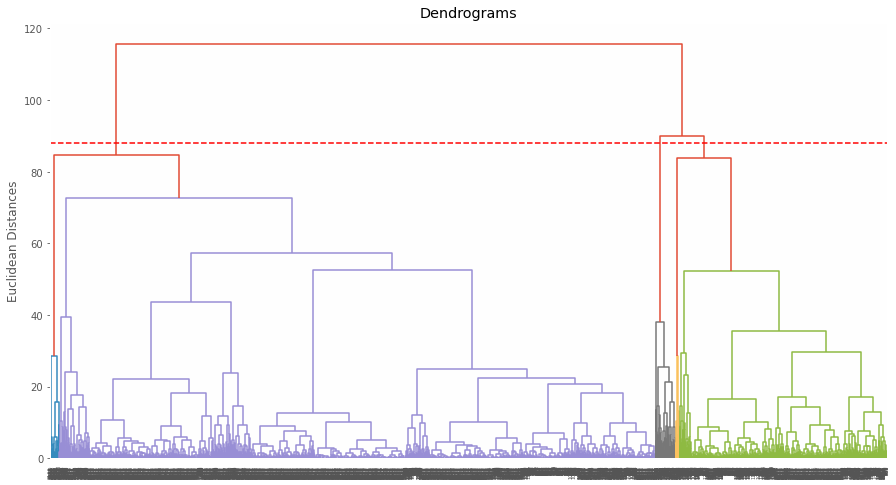

In [132]:
#Euclidean distance, Ward method

plt.figure(figsize=(15,8))  
plt.title("Dendrograms") 
plt.ylabel('Euclidean Distances')
Z = hierarchy.linkage(normalized_data, 'ward', 'euclidean')
dendo = hierarchy.dendrogram(Z)
plt.axhline(y=88, color='r', linestyle='--')

### Compare cluster centroids and characterize different clusters

In [155]:
from scipy import cluster
cutree = cluster.hierarchy.cut_tree(Z, n_clusters = 3)

In [195]:
membership = pd.DataFrame(cutree)
mydata["Cluster_number"] = membership

/var/folders/d5/clg7gjdd28v239ykrpb65_d80000gn/T/ipykernel_21577/16300284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata["Cluster_number"] = membership


In [158]:
cluster1 = mydata.loc[mydata["Cluster_number"]==0,]
cluster2 = mydata.loc[mydata["Cluster_number"]==1,]
cluster3 = mydata.loc[mydata["Cluster_number"]==2,]

In [159]:
cluster1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster_number
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.0,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.0
mean,50730.653992,174.875907,1.393363,1.020048,1.0,6983.188731,8.488075,327.127549,0.998617,3678.250951,0.0
std,61552.389285,879.548091,0.791193,0.173282,0.0,9858.564984,8.063348,821.391014,2.377714,1996.032103,0.0
min,0.000000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.0
25%,14554.000000,0.000000,1.000000,1.000000,1.0,500.000000,2.000000,0.000000,0.000000,1986.000000,0.0
50%,31236.000000,0.000000,1.000000,1.000000,1.0,3225.000000,6.000000,0.000000,0.000000,3502.000000,0.0
75%,62907.000000,0.000000,1.000000,1.000000,1.0,9574.000000,14.000000,190.000000,1.000000,5139.000000,0.0
max,644881.000000,11148.000000,5.000000,3.000000,1.0,78916.000000,65.000000,10850.000000,26.000000,8296.000000,0.0


In [162]:
cluster2.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster_number
count,1.010000e+03,1010.000000,1010.000000,1010.0,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.0
mean,1.319819e+05,32.334653,3.909901,1.0,1.048515,43850.836634,18.530693,249.277228,0.812871,5292.138614,1.0
std,1.497039e+05,245.446158,0.845205,0.0,0.386367,29113.204261,6.636801,527.819835,1.798478,1752.108984,0.0
min,3.290000e+02,0.000000,1.000000,1.0,1.000000,2500.000000,3.000000,0.000000,0.000000,669.000000,1.0
25%,5.076000e+04,0.000000,3.000000,1.0,1.000000,24789.000000,14.000000,0.000000,0.000000,4051.000000,1.0
50%,9.342200e+04,0.000000,4.000000,1.0,1.000000,38065.500000,17.000000,0.000000,0.000000,5546.500000,1.0
75%,1.521492e+05,0.000000,5.000000,1.0,1.000000,56262.750000,21.000000,350.000000,1.000000,6553.750000,1.0
max,1.704838e+06,2919.000000,5.000000,1.0,5.000000,263685.000000,53.000000,6393.000000,23.000000,8296.000000,1.0


In [161]:
cluster3.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster_number
count,96.000000,96.000000,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.00000,96.0
mean,148606.020833,393.125000,2.666667,1.0,1.0,42401.354167,32.541667,6683.468750,18.572917,5040.40625,2.0
std,127199.295080,880.577409,1.690012,0.0,0.0,34840.636569,13.627307,4343.152423,9.617686,2045.33102,0.0
min,231.000000,0.000000,1.000000,1.0,1.0,2900.000000,2.000000,1400.000000,1.000000,1041.00000,2.0
25%,58250.750000,0.000000,1.000000,1.0,1.0,12387.500000,23.750000,3908.500000,12.000000,3496.50000,2.0
50%,120042.000000,0.000000,3.000000,1.0,1.0,30444.000000,32.000000,6062.500000,17.000000,5234.50000,2.0
75%,191709.500000,0.000000,4.000000,1.0,1.0,66249.000000,39.250000,7947.750000,23.250000,6669.00000,2.0
max,707079.000000,4704.000000,5.000000,1.0,1.0,153183.000000,86.000000,30817.000000,53.000000,8296.00000,2.0


In [163]:
mydata.groupby('Cluster_number').agg({'Balance':'mean','Qual_miles':'mean','cc1_miles':'mean','cc2_miles':'mean','cc3_miles':'mean', 
                                              'Bonus_miles':'mean','Bonus_trans':'mean', 'Flight_miles_12mo':'mean','Flight_trans_12':'mean',
                                              'Days_since_enroll':'mean'})

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Cluster_number,,,,,,,,,,
0,50730.653992,174.875907,1.393363,1.020048,1.000000,6983.188731,8.488075,327.127549,0.998617,3678.250951
1,131981.929703,32.334653,3.909901,1.000000,1.048515,43850.836634,18.530693,249.277228,0.812871,5292.138614
2,148606.020833,393.125000,2.666667,1.000000,1.000000,42401.354167,32.541667,6683.468750,18.572917,5040.406250


Here we can see that, Cluster 0 represents fliers from mid income group or the frequent fliers with economy class who travel frequently for work. Cluster 1 contains frequent fliers purchasing business class tickets or may be customers of high income group. Cluster 2 consists of fliers who are not frequent or are first timers.

### Check stability of clusters

In [165]:
## take 95% sample of the dataset and check clusters

normalized_data_sample = normalized_data.sample(frac = 0.95)

In [167]:
normalized_data_sample.shape # 95% sample of dataset

(3799, 10)

In [168]:
normalized_data.shape # Checking original dataset rows and columns

(3999, 10)

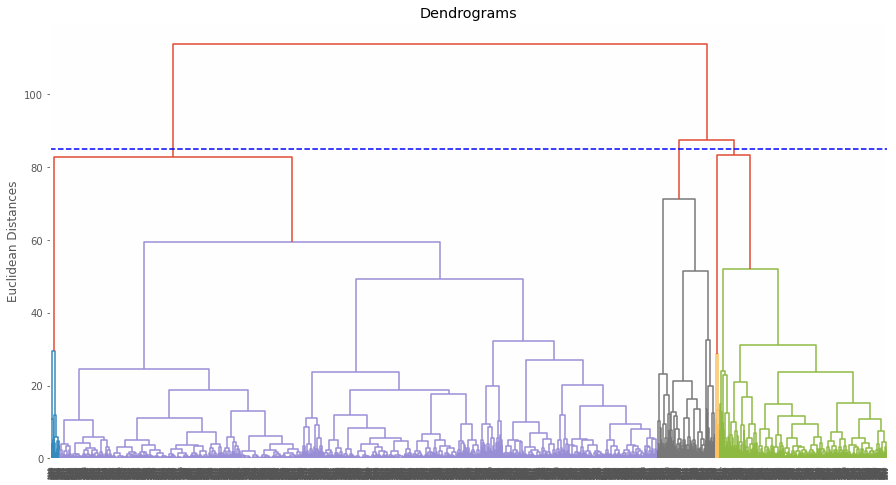

In [171]:
plt.figure(figsize=(15,8))  
plt.title("Dendrograms") 
plt.ylabel('Euclidean Distances')
Z_2 = hierarchy.linkage(normalized_data_sample, 'ward', 'euclidean')
dendo_sample = hierarchy.dendrogram(Z_2)
plt.axhline(y=85, color='b', linestyle='--')

Overall shape of the dendrogram has changed slightly, which was expected. 
A few extra clusters have emerged and are more visible than earlier. It can also be noticed that the distance between some other clusters has also increased, resulting in chage of size as a measure of distance.

### Cluster all passengers using k-means clustering

Let us determine the number of clusters using Elbow method

In [182]:
# k-means clustering

fit = KMeans(n_clusters = 3, max_iter = 10, random_state = 0).fit(normalized_data)

In [183]:
fit.labels_
fit.cluster_centers_
fit.n_iter_
fit.inertia_

27558.733200363567

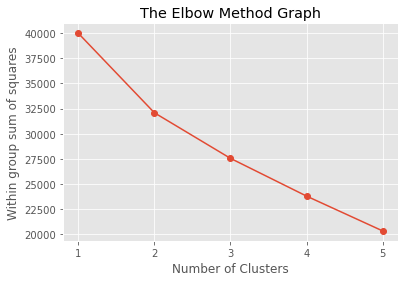

In [194]:
Cluster_Variability = []
for i in range (1,6):
    kmeans = KMeans(n_clusters = i).fit(normalized_data)
    Cluster_Variability.append(kmeans.inertia_)
    
plt.plot(range(1,6), Cluster_Variability, marker = 'o')
plt.title('The Elbow Method Graph')
plt.xticks(range(1,6))
plt.xlabel('Number of Clusters')
plt.ylabel('Within group sum of squares')
plt.show()

As we see some change in the slope of the curve from Cluster 2 onwards, it makes sense to form only 2 clusters. Any more cluster formation after 2 clusters would be redundant and not give us any reasonable insight 

In [204]:
## some trivial analysis
fit = KMeans(n_clusters=2, max_iter = 10, random_state=0).fit(normalized_data)

In [205]:
mydata["Kmean_Clusters"] = fit.labels_
mydata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster_number,Kmean_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [206]:
mydata.groupby('Kmean_Clusters').agg({'Balance':'mean','Qual_miles':'mean','cc1_miles':'mean','cc2_miles':'mean','cc3_miles':'mean', 
                                              'Bonus_miles':'mean','Bonus_trans':'mean', 'Flight_miles_12mo':'mean','Flight_trans_12':'mean',
                                              'Days_since_enroll':'mean'})

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Kmean_Clusters,,,,,,,,,,
0,141269.607113,261.654260,3.708850,1.006617,1.039702,43447.885856,20.781638,1004.803143,3.008271,5019.706369
1,44278.406452,93.180645,1.344803,1.017921,1.000358,5746.862366,7.624014,223.998566,0.665233,3728.062366


In [207]:
EastWestAirlineCluster = input

In [208]:
EastWestAirlineCluster['fit$cluster'] = fit.labels_

In [220]:
mydata.to_csv("Clustered Airlines Data.csv")

In [209]:
EastWestAirlineCluster.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,fit$cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


### Let us compare characteristics of clusters obtained from Hierarchical and k-means

#### Hierarchical

In [213]:
mydata.groupby('Cluster_number').agg({'Balance':'mean','Qual_miles':'mean','cc1_miles':'mean','cc2_miles':'mean','cc3_miles':'mean', 
                                              'Bonus_miles':'mean','Bonus_trans':'mean', 'Flight_miles_12mo':'mean','Flight_trans_12':'mean',
                                              'Days_since_enroll':'mean'})

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Cluster_number,,,,,,,,,,
0,50730.653992,174.875907,1.393363,1.020048,1.000000,6983.188731,8.488075,327.127549,0.998617,3678.250951
1,131981.929703,32.334653,3.909901,1.000000,1.048515,43850.836634,18.530693,249.277228,0.812871,5292.138614
2,148606.020833,393.125000,2.666667,1.000000,1.000000,42401.354167,32.541667,6683.468750,18.572917,5040.406250


Using hierarchical clustering it was easy to form 3 clusters by cutting the dendrogram at y=88. However, we could see from that stats that attributes like 'Balance', 'Bonus Miles' and 'Days since Enroll'are somewhat being grouped majorly into 2 segments.

#### K-means

In [214]:
mydata.groupby('Kmean_Clusters').agg({'Balance':'mean','Qual_miles':'mean','cc1_miles':'mean','cc2_miles':'mean','cc3_miles':'mean', 
                                              'Bonus_miles':'mean','Bonus_trans':'mean', 'Flight_miles_12mo':'mean','Flight_trans_12':'mean',
                                              'Days_since_enroll':'mean'})

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Kmean_Clusters,,,,,,,,,,
0,141269.607113,261.654260,3.708850,1.006617,1.039702,43447.885856,20.781638,1004.803143,3.008271,5019.706369
1,44278.406452,93.180645,1.344803,1.017921,1.000358,5746.862366,7.624014,223.998566,0.665233,3728.062366


We see that using k-means, we could form 2 clusters which makes sense in terms of categorizing the customers on attributes like 'Balance', 'Bonus Miles', 'Flight miles', 'Bonus Trans' and 'Flight_miles_12mo'. These are clear differentiators for us to target the customers for further engagement.

### Cluster targetting on offers

Let us first discuss about Cluster 0
1. From the data generated from k-means clustering, we can see that the people in cluster 0 have huge acumulation of Balance miles which can be further utilised for travel. 
2. The Bonus_miles attibute which means the miles collected from non-flight bonus transactions for this cluster is also very high. 
3. Flight_miles_12mo which is a representation of number of flight miles earned in the past 12 months, is also high for this cluster


From the above points, we can conclude that people in cluster 0 are very frequent fliers which is why they have huge accumulation of Balance points. They have also earned bonus miles as from non-flight transactions which means they are extensive users of credit cards which earns them miles outside flight bookings.
This cluster is clearly a business group with big earnings and equally large spends.
We can offer them complimentary services and added loyalty benefits to improve stickiness with the brand so that they keep using the airlines and offers.
We can also charge them a mark up on our regular services and they would easily accept the surge pricing

Now let us draw our attention to Cluster 1

1. It is quite evident that customers in Cluster 1 are those who fly economy class and who travel on need basis. 
2. We can focus on increasing the air travel for this cluster by giving discounts on flights, added bonus for using miles and upgrade to first class to improve customer experience and build traction.